Cross validation:


In [6]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Step 1: Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Step 2: Create a list to store the cross-validation scores
cv_scores = []

# Step 3: Perform cross-validation on each polynomial degree
for degree in range(9):
    # Create a polynomial model pipeline
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Perform cross-validation and compute the mean squared error
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_score = -scores.mean()  # negate the score to get mean squared error
    
    # Append the mean squared error to the list of scores
    cv_scores.append(mean_score)

# Step 4: Print the cross-validation scores for each degree
for degree, score in enumerate(cv_scores):
    print(f"Degree {degree}: Cross-Validation Score = {score}")


Degree 0: Cross-Validation Score = 5982.413413836098
Degree 1: Cross-Validation Score = 2993.0813104693316
Degree 2: Cross-Validation Score = 3495.263074264338
Degree 3: Cross-Validation Score = 1029114.9685735616
Degree 4: Cross-Validation Score = 431051.2918990098
Degree 5: Cross-Validation Score = 411422.33224330394
Degree 6: Cross-Validation Score = 411811.1242879096
Degree 7: Cross-Validation Score = 411818.16774613765
Degree 8: Cross-Validation Score = 411814.4799992074


Construct a table summarizing the cross-validation results. Each model should have a separate row in the table. Include the R-Squared and Mean Absolute Error (MAE) metrics for each model. Calculate the mean value and standard deviation of these metrics from the cross-validation. Include both values

In [7]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_predict

#  Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

 # Create empty lists to store the metrics
degrees = range(9)
cv_scores_r2 = []
cv_scores_mae = []


# Step 5: Perform cross-validation and compute predictions for each polynomial degree
for degree in degrees:
    # Create a polynomial model pipeline
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Perform cross-validation and obtain predictions
    predictions = cross_val_predict(model, X, y, cv=5)
    
    # Calculate R-Squared score and MAE using the true target values and predictions
    r2 = r2_score(y, predictions)
    mae = mean_absolute_error(y, predictions)
    
    # Append the scores to the lists
    cv_scores_r2.append(r2)
    cv_scores_mae.append(mae)

# Step 6: Calculate mean and standard deviation of the metrics
mean_r2 = np.mean(cv_scores_r2)
std_r2 = np.std(cv_scores_r2)
mean_mae = np.mean(cv_scores_mae)
std_mae = np.std(cv_scores_mae)

# Step 7: Print the table summarizing the cross-validation results
print("Model\tR-Squared\tMAE")
for degree, r2, mae in zip(degrees, cv_scores_r2, cv_scores_mae):
    print(f"Degree {degree}\t{r2:.4f}\t\t{mae:.4f}")
print(f"Mean\t{mean_r2:.4f}\t\t{mean_mae:.4f}")
print(f"Std\t{std_r2:.4f}\t\t{std_mae:.4f}")


Model	R-Squared	MAE
Degree 0	-0.0088		66.0393
Degree 1	0.4953		44.2749
Degree 2	0.4109		46.6029
Degree 3	-171.8482		341.9649
Degree 4	-71.8599		303.1024
Degree 5	-68.5441		295.6382
Degree 6	-68.6102		295.5843
Degree 7	-68.6114		295.5829
Degree 8	-68.6108		295.5773
Mean	-57.4653		220.4852
Std	51.4203		119.8554


Identification of the Best Model: Identify the model that exhibits the highest performance based on the R-Squared and MAE metrics. Provide an explanation for choosing this specific model. 

In [8]:
# Step 8: Find the best model based on R-Squared and MAE
best_model_r2_degree = np.argmax(cv_scores_r2)
best_model_mae_degree = np.argmin(cv_scores_mae)

# Step 9: Print the best model and its corresponding metrics
print("Best Model Based on R-Squared:")
print(f"Degree {best_model_r2_degree}: R-Squared = {cv_scores_r2[best_model_r2_degree]:.4f}")

print("\nBest Model Based on MAE:")
print(f"Degree {best_model_mae_degree}: MAE = {cv_scores_mae[best_model_mae_degree]:.4f}")


Best Model Based on R-Squared:
Degree 1: R-Squared = 0.4953

Best Model Based on MAE:
Degree 1: MAE = 44.2749


Additional analysis and interpretation of the models' performance

Best Model Based on R-Squared:
Degree 1: R-Squared = 0.4953


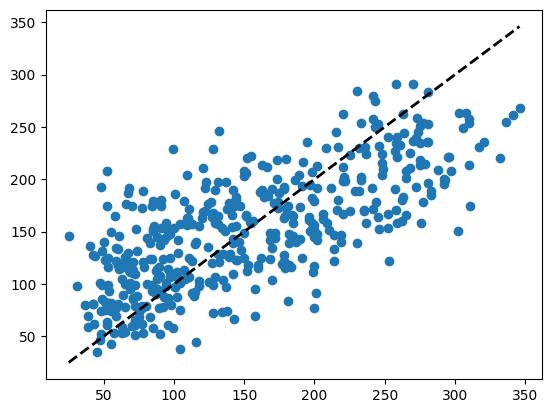

In [9]:
import matplotlib.pyplot as plt

#  Print the best model and its corresponding metrics
print("Best Model Based on R-Squared:")
print(f"Degree {best_model_r2_degree}: R-Squared = {cv_scores_r2[best_model_r2_degree]:.4f}")

# Create a scatter plot for the best model based on R-Squared
best_model_r2 = make_pipeline(PolynomialFeatures(best_model_r2_degree), LinearRegression())
best_model_r2.fit(X, y)
predictions_r2 = best_model_r2.predict(X)

plt.scatter(y, predictions_r2)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) 
